In [2]:
import MeCab

tagger = MeCab.Tagger()

with open('neko.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
result = tagger.parse(text)

with open('neko.txt.mecab', 'w', encoding='utf-8')as fw:
    fw.write(result)

In [13]:
import MeCab

mecab = MeCab.Tagger()


sentences = []
morphs = []

with open('neko.txt.mecab', 'r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attr = fields[1].split(',')
                morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []
            
for morph in sentences[2]:
    print(morph)



{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31.動詞

In [38]:
import MeCab

mecab = MeCab.Tagger()

with open('neko.txt.mecab', 'r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attr = fields[1].split(',')
                morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []
            
for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


In [39]:
print(len(sentences))

29892


In [40]:
ans = set()
for sentence in sentences:
#     print(sentence)
    for sense in sentence:
#         print(sense)
        if sense['pos'] == '動詞':
            ans.add(sense['surface'])
            
print(f'動詞の表層形の種類 : {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類 : 3893

窺う
当っ
しかり
謡わ
違い
疲れる
隠し
立っ
足る
砕ける


## 動詞の基本形

In [41]:
ans32 = set()
for sentence in sentences:
#     print(sentence)
    for sense in sentence:
#         print(sense)
        if sense['pos'] == '動詞':
            ans.add(sense['base'])
            
print(f'動詞の基本形の種類 : {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)

動詞の基本形の種類 : 5134

窺う
隠し
砕ける
張り詰める
頼ん
蒔き
清め
繰返す
悔やん
とろ


## 32. AのB

In [46]:
ans = set()
for sentence in sentences:
#     print(sentences[3])
    for i in range(1, len(sentence) - 1):
        if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos'] == '名詞':
            ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

---サンプル---
皿のカステラ
たちの最後
彼のアムビション
生者必滅の道
君の模写
家の勢力
この間の枝
朋友のよう
当世の人間
君の創作


## 名詞の連接

In [55]:
ans = set()

for sentence in sentences:
    nouns = ''
    num = 0
    for s in sentence:
        if s['pos'] == '名詞':
            num += 1
            nouns += s['surface']
#         print(nouns)
        elif num >= 2 :
           ans.add(nouns)
           nouns = ''
           num = 0
        else:
            nouns = ''
            num = 0
        if num >= 2:
            ans.add(nouns)

print(f'連接名詞の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

連接名詞の種類: 5579

---サンプル---
大分神秘的
一番遠慮
敷居越
悪事千里
埼玉生れ
青軸
阿倍川餅
二十七銭
座敷中
それぎり音


## 35.単語の出現頻度

In [63]:
ans = set()

words = []
counts = []
for sentence in sentences:
    for s in sentence:
        if s['surface'] in words:
            counts[words.index(s['surface'])] += 1
        else:
            words.append(s['surface'])
            counts.append(1)

words_count = dict(zip(words, counts))
words_count_rank = sorted(words_count.items(), key=lambda x:x[1], reverse=True)
print(words_count_rank[:10])
    


[('の', 27582), ('。', 22458), ('て', 20604), ('、', 20316), ('は', 19260), ('に', 18729), ('を', 18213), ('と', 16524), ('が', 16011), ('た', 11964)]


## 頻度上位10語

{'の': 27582, '。': 22458, 'て': 20604, '、': 20316, 'は': 19260, 'に': 18729, 'を': 18213, 'と': 16524, 'が': 16011, 'た': 11964}


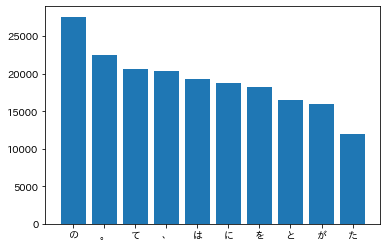

In [79]:
import matplotlib.pyplot as plt
import japanize_matplotlib

words_dict = dict(words_count_rank[:10])
print(words_dict)
words_graph = plt.bar(list(words_dict.keys()), list(words_dict.values()))
plt.show()


## 37.猫と共起頻度の高い上位10語

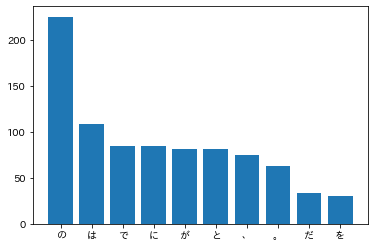

In [85]:
import matplotlib.pyplot as plt
from collections import defaultdict
ans = defaultdict(int)

# print(sentences[:10])

for sentence in sentences:
    for i, s in enumerate(sentence):
        if s['surface'] == '猫':
            pre_word = sentence[i-1]['surface']
            aft_word = sentence[i+1]['surface']    
            ans[pre_word] += 1
            ans[aft_word] += 1
            
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)
            
cat_counts = dict(ans[:10]) 
cat_graph = plt.bar(list(cat_counts.keys()), list(cat_counts.values()))
plt.show()

## ヒストグラム

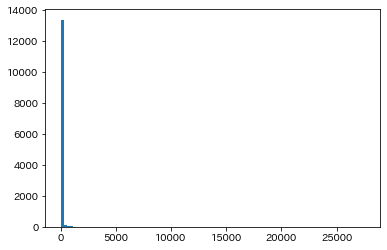

In [89]:
all_words_dict = dict(words_count_rank)

plt.hist(list(all_words_dict.values()), bins=100)
plt.show()

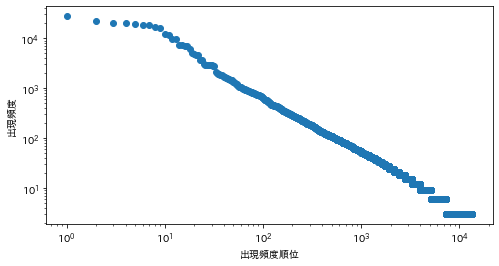

In [90]:

ranks = [w+1 for w in range(len(words_count_rank))]
values = [x[1] for x in words_count_rank]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()